In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

telemetry-accelerate-decelerate.csv
max RPM: 780.156548052


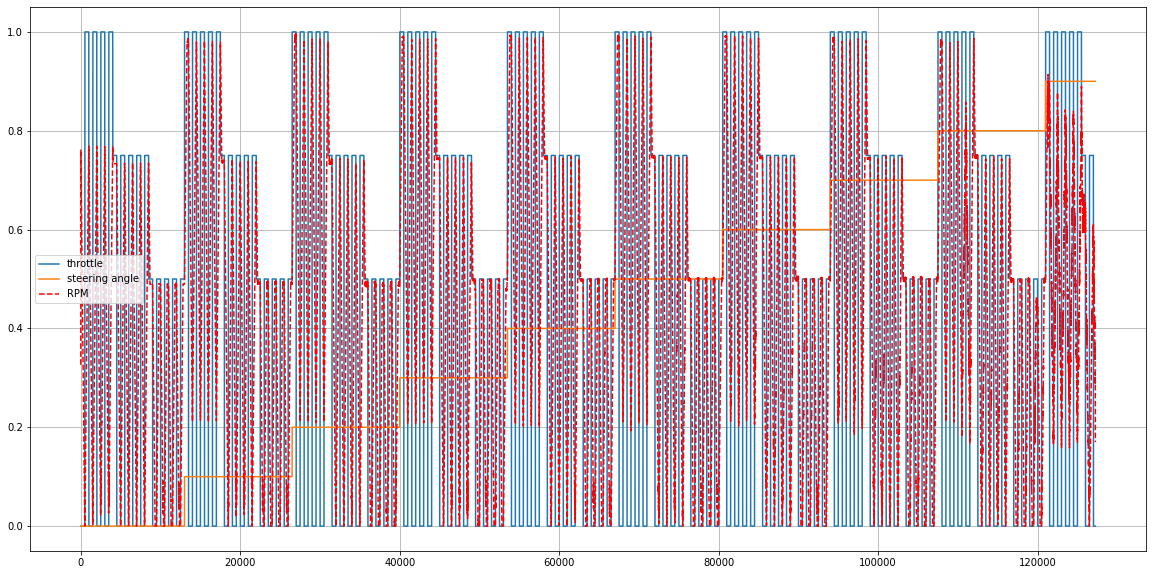

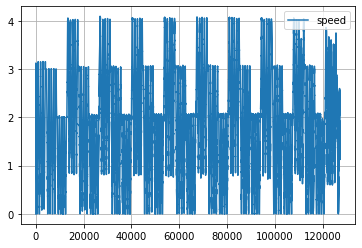

In [4]:
%matplotlib inline

max_rpm = 0

file = "telemetry-accelerate-decelerate.csv"
period = 7
print(file)
csv = pd.read_csv(file)
max_rpm = max(max_rpm, max(csv["motor_rpm"]))
csv["motor_rpm"] = np.convolve(csv["motor_rpm"], np.ones((period,)) / period, mode='same')
    
print("max RPM: {}".format(max_rpm))
    
plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(csv["throttle_input"], label="throttle")
plt.plot(csv["steering_angle_input"], label="steering angle")
plt.plot(csv["motor_rpm"] / max_rpm, 'r--', label="RPM")
plt.legend()
plt.show()

plt.grid()
#plt.plot(csv["throttle_input"], label="throttle")
#plt.plot(csv["steering_angle_input"], label="steering angle")
plt.plot(csv["speed"], label="speed")
plt.legend()
plt.show()

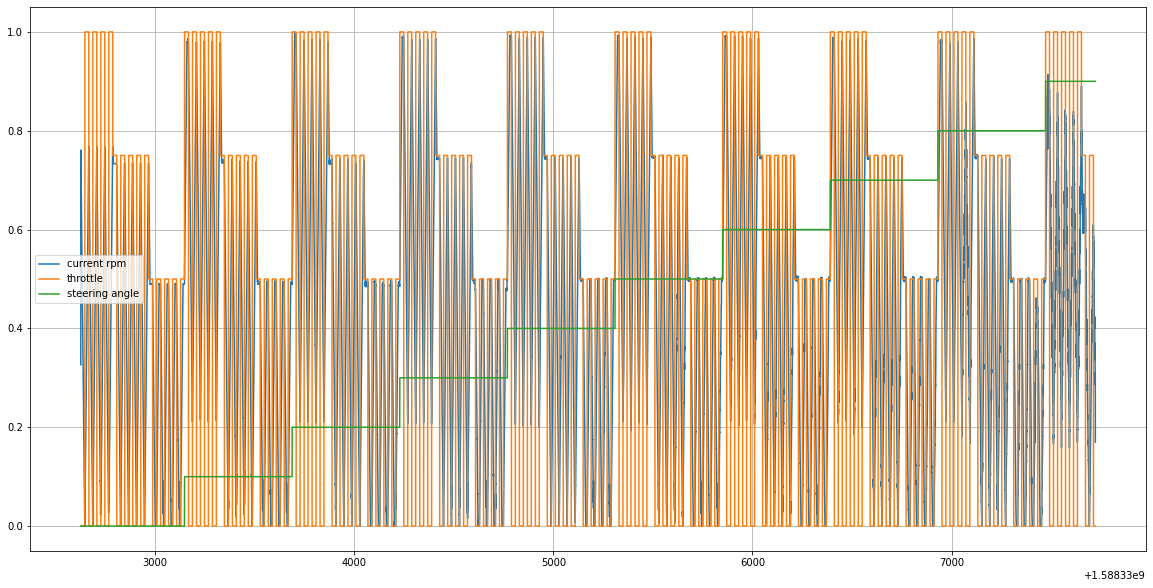

In [5]:
# I want the intput to be in the form of:
# (current RPM, throttle input, steering input, RPM change rate)

import numpy as np

data = np.array(np.zeros(5))

previous_rpm = 0
for index, row in csv.iterrows():
    next_rpm = row["motor_rpm"] / max_rpm       
    previous_rpm = next_rpm

    record = [previous_rpm, row["throttle_input"], row["steering_angle_input"], next_rpm, row["time"]]

    data = np.vstack((data, record))

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(data[1:, 4], data[1:, 0], label="current rpm")
plt.plot(data[1:, 4], data[1:, 1], label="throttle")
plt.plot(data[1:, 4], data[1:, 2], label="steering angle")
plt.legend()
plt.show()

In [13]:
o = 100

prev = data[o:,3][0]
y = []
for d in data[o:,1]:
    dx = d - prev
    y.append(dx)
    prev = d

plt.plot(data[o:,4], data[o:,1] / 100.0, label="Throttle input")
plt.plot(data[o:,4], data[o:,2] / 100.0, label="Steering input")
plt.plot(data[o:,4], y, 'g.', label="slopes", markersize=0.1)
plt.legend()
plt.show()

In [7]:
x = data[o:,1]
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

m, c

(0.0029142863062544995, -0.0012268580795706985)

In [8]:
%matplotlib qt

plt.plot(data[o:,4], m*x + c, 'r.', label="calculated", markersize=0.5)
plt.plot(data[o:,4], y, 'g.', label="slopes", markersize=0.5)
plt.legend()
plt.show()

In [17]:
%matplotlib qt

x = data[0,1]
predicted = []
for t in data[:,1]:
    if x < t:
        x += 0.0016
    elif x > t:
        x -= 0.0016
    else:
        x = t

    predicted.append(x)


plt.plot(data[2:,4], data[2:,1], label="Throttle input")
# plt.plot(data[o:(o+l),2], label="Steering input")
plt.plot(data[2:,4], predicted[2:], 'r--', label="Predicted by model")
plt.plot(data[2:,4], data[2:,3], 'g', label="Expected")

plt.legend()
plt.show()

In [19]:
data[5,4]-data[4,4]

0.039999961853027344

In [20]:
data[100001,4]-data[100000,4]

0.040000200271606445